Introduction to tensorflow and Gaussian and Gabor filters as a part of the Creative Applications of Deep Learning offered by Kadenze

Working through examples here: https://github.com/pkmital/CADL/blob/master/session-1/lecture-1.ipynb

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-3.0, 3.0, 20)
print(x)

[-3.         -2.68421053 -2.36842105 -2.05263158 -1.73684211 -1.42105263
 -1.10526316 -0.78947368 -0.47368421 -0.15789474  0.15789474  0.47368421
  0.78947368  1.10526316  1.42105263  1.73684211  2.05263158  2.36842105
  2.68421053  3.        ]


In [3]:
# x is a tensor which is the output of the linspace operation in the tensorflow graph
# the operation is added to the default tensorflow graph
x = tf.linspace(-3.0, 3.0, 20)
print (x)

Tensor("LinSpace:0", shape=(20,), dtype=float32)


In [4]:
# get the default graph and the operations in the graph
g = tf.get_default_graph()
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

In [6]:
# get the output of the operation LinSpace_1 
# i.e. suffix ':0' indicates that the output is needed.
g.get_tensor_by_name('LinSpace:0')

<tf.Tensor 'LinSpace:0' shape=(20,) dtype=float32>

In [7]:
sess = tf.Session()
cx = sess.run(x)
print(cx)

cx = x.eval(session=sess)
print(cx)

sess.close()

[-3.         -2.6842105  -2.368421   -2.0526316  -1.7368422  -1.4210527
 -1.1052632  -0.7894738  -0.4736843  -0.15789485  0.15789461  0.47368407
  0.78947353  1.1052628   1.4210525   1.7368422   2.0526314   2.3684206
  2.6842103   3.        ]
[-3.         -2.6842105  -2.368421   -2.0526316  -1.7368422  -1.4210527
 -1.1052632  -0.7894738  -0.4736843  -0.15789485  0.15789461  0.47368407
  0.78947353  1.1052628   1.4210525   1.7368422   2.0526314   2.3684206
  2.6842103   3.        ]


In [8]:
sess = tf.InteractiveSession()
x.eval() # the session is not explicitly specified in the eval, the interactive session is used.

array([-3.        , -2.6842105 , -2.368421  , -2.0526316 , -1.7368422 ,
       -1.4210527 , -1.1052632 , -0.7894738 , -0.4736843 , -0.15789485,
        0.15789461,  0.47368407,  0.78947353,  1.1052628 ,  1.4210525 ,
        1.7368422 ,  2.0526314 ,  2.3684206 ,  2.6842103 ,  3.        ],
      dtype=float32)

In [9]:
print(x.get_shape())
print(x.get_shape().as_list())

(20,)
[20]


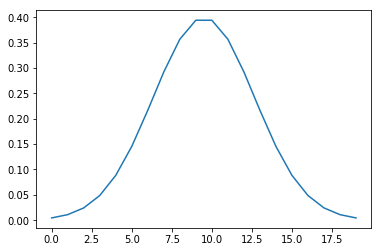

In [10]:
# Gaussian curve
mean = 0.0
sigma = 1.0

z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
res = z.eval()
plt.plot(res)

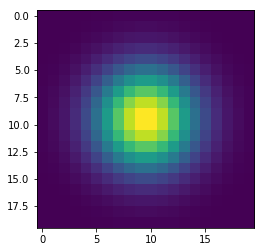

In [11]:
# 2D Gaussian kernel
# z above is basically a vector. To get a 2D (matrix), multiply z by its transpose.
ksz = z.get_shape().as_list()[0]
z_2d = tf.matmul(tf.reshape(z, (ksz, 1)), tf.reshape(z, (1, ksz)))
plt.imshow(z_2d.eval())

(512, 512)


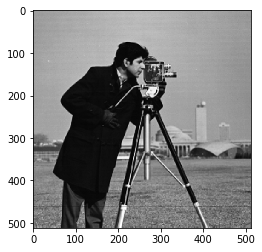

In [12]:
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

In [13]:
# While handling images in tensorflow, they need to be represented as a 4D array:
# N x H x W x C
# where N = number of images (or batch size)
# H = height of the image
# W = width of the image
# C = number of channels
# In this case, N = 1 and C = 1 since the image is grayscale.
img_4d = tf.reshape(img, (1, img.shape[0], img.shape[1], 1))
print(img_4d)
print(img_4d.get_shape().as_list())

Tensor("Reshape_2:0", shape=(1, 512, 512, 1), dtype=float32)
[1, 512, 512, 1]


In [14]:
# The Gaussian kernel should also be represented as 4D array so it can be used 
# to convolve the above image.
# KH x KW x NI x NO
# where KH = kernel height
# KW = kernel width
# NI = number of input channels, this should match the number of channels in the image above.
# NO = number of output channels
zshape = z_2d.get_shape().as_list()
print(zshape)
z_4d = tf.reshape(z_2d, (zshape[0], zshape[1], 1, 1))
print(z_4d)
print(z_4d.get_shape().as_list())

[20, 20]
Tensor("Reshape_3:0", shape=(20, 20, 1, 1), dtype=float32)
[20, 20, 1, 1]


In [15]:
# Convolve the image using the kernel
# strides indicates how the kernel should move across the image.
# e.g. [1,1,1,1] = every image, every pixel, every channel 
# e.g. [1,2,2,1] = every image, every 2nd pixel, every channel
# padding='SAME' implies the image size must be the same after the convolution.
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 512, 512, 1)


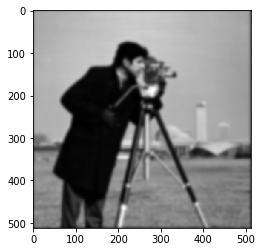

In [16]:
plt.imshow(res[0, :, :, 0], cmap='gray')

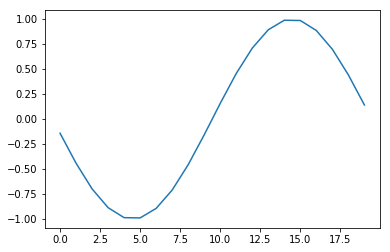

In [17]:
# Create a Gabor kernel
# A Gabor kernel (according to wikipedia) is a Gaussian kernel modulated with a sine wave.
xs = tf.linspace(-3.0, 3.0, 20)
ys = tf.sin(xs)
plt.plot(ys.eval())
ys = tf.reshape(ys, (20, 1))

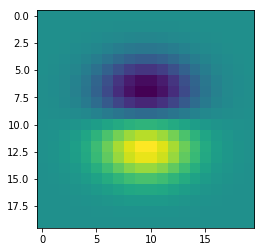

In [18]:
ones = tf.ones((1, 20))
w = tf.matmul(ys, ones)
gabor = tf.multiply(z_2d, w)
plt.imshow(gabor.eval())

In [19]:
# Create the tensorflow graph with appropriate placeholders for the inputs.
img = tf.placeholder(tf.float32, shape=[None, None], name='img')

# reshape img to the expected input dims N x H x W x C
# expand_dims adds a singleton dimension to the specified axis.
# this converts img to H x W x 1
img_3d = tf.expand_dims(img, 2)
# this converts img_3d to 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
kersize = tf.placeholder(tf.int32, name='kersize')

# Gaussian filter
x = tf.linspace(-3.0, 3.0, kersize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

z_2d = tf.matmul(
    tf.reshape(z, (kersize, 1)),
    tf.reshape(z, (1, kersize))
)

gauss_4d = tf.reshape(z_2d, (kersize, kersize, 1, 1))

# Gabor filter
ys = tf.sin(x)
ys = tf.reshape(ys, (kersize, 1))
ones = tf.ones((1, kersize))
gabor = tf.multiply(z_2d, tf.matmul(ys, ones))
gabor_4d = tf.reshape(gabor, (kersize, kersize, 1, 1))

conv_gauss = tf.nn.conv2d(img_4d, gauss_4d, strides=[1, 1, 1, 1], padding='SAME')
cimg_gauss = conv_gauss[0, :, :, 0]

conv_gabor = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME')
cimg_gabor = conv_gabor[0, :, :, 0]

[1, None, None, 1]


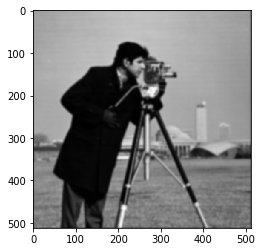

In [20]:
res = cimg_gauss.eval(feed_dict={img: data.camera(), mean: 0.0, sigma: 0.5, kersize: 25})
plt.imshow(res, cmap='gray')

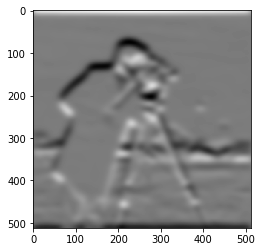

In [21]:
res = cimg_gabor.eval(feed_dict={img: data.camera(), mean: 0.0, sigma: 0.5, kersize: 100})
plt.imshow(res, cmap='gray')